# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

### Autor: Evandro Avellar

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [26]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [27]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [28]:
# Calcule a média de preço por marca e por veículo

lista_marcas = df["brand"].unique()
lista_tipos = df["vehicleType"].unique()
dft = pd.DataFrame()

for m in lista_marcas:
    for t in lista_tipos:
        x = df[(df["brand"] == m) & (df["vehicleType"] == t)]["price"].mean()
        dft = dft.append(pd.DataFrame({'brand':m , 'vehicleType':t , 'avgPrice':x}, index=[0]))
dft = dft.reset_index()
del dft["index"]
dft["avgPrice"].fillna(0,inplace=True)
dft["avgPrice"].isnull().value_counts()
dft["avgPrice"] = dft["avgPrice"].astype(int)
dft.head(5)


,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

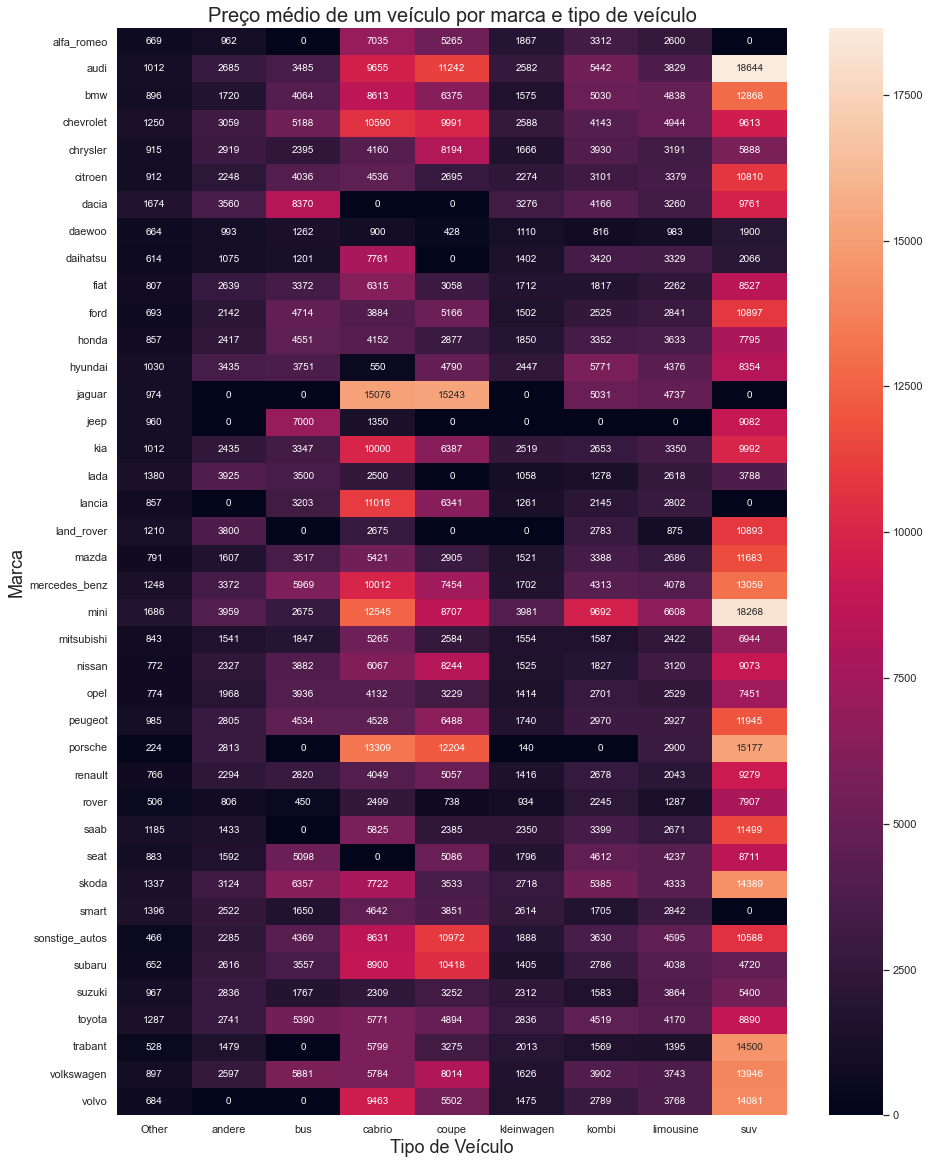

In [29]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
plt.figure(figsize=(15,20))
valores = dft.pivot("brand","vehicleType", "avgPrice")
ax8 = sns.heatmap(valores, annot=True, fmt="d")
plt.title("Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
plt.xlabel("Tipo de Veículo",fontdict= {'size':18})
plt.ylabel("Marca",fontdict= {'size':18})
plt.show()

In [30]:
# Salvando o plot
fig = ax8.get_figure()
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

# Fim